*INTECHHUB DATA SCIENCE INTERVIEW TASK*



**This dataset contains 3.682 records of courses from 4 subjects (Business Finance, Graphic Design, Musical Instruments and Web Design) taken from Udemy.
Udemy is a massive online open course (MOOC) platform that offers both free and paid courses. Anybody can create a course, a business model by which allowed Udemy to have hundreds of thousands of courses.**


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

# Loading the dataset

In [35]:
data = pd.read_csv("udemy_courses.csv")
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
# shape of the dataset
data.shape

(3678, 12)

In [4]:
# show the statistics of the dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
course_id,3683.0,676059.360033,343189.261835,8324.0,407727.0,688092.0,961203.0,1282064.0
price,3683.0,66.030410,60.973709,0.0,20.0,45.0,95.0,200.0
num_subscribers,3683.0,3193.641053,9498.145509,0.0,111.0,909.0,2537.5,268923.0
num_reviews,3683.0,156.115667,934.827421,0.0,4.0,18.0,67.0,27445.0
num_lectures,3683.0,40.100190,50.351389,0.0,15.0,25.0,45.5,779.0
content_duration,3683.0,4.092760,6.049968,0.0,1.0,2.0,4.5,78.5


In [5]:
# show info about the columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3683 non-null   int64  
 1   course_title         3683 non-null   object 
 2   url                  3683 non-null   object 
 3   is_paid              3683 non-null   bool   
 4   price                3683 non-null   int64  
 5   num_subscribers      3683 non-null   int64  
 6   num_reviews          3683 non-null   int64  
 7   num_lectures         3683 non-null   int64  
 8   level                3683 non-null   object 
 9   content_duration     3683 non-null   float64
 10  published_timestamp  3683 non-null   object 
 11  subject              3683 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 320.2+ KB


In [6]:
# Checking null values
data.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

#### EDA STEPS

In [7]:
# Check duplicated values
data[data.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development
3678,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.000000,2016-06-14T17:36:46Z,Web Development
3679,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.500000,2017-03-10T22:24:30Z,Web Development
3680,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.500000,2015-12-30T16:41:42Z,Web Development
3681,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.000000,2016-08-11T19:06:15Z,Web Development


In [8]:
# drop the duplicated rows
data = data.drop_duplicates()
data.shape

(3672, 12)

In [5]:
# Separate year and time from 'published_timestamp' column 
dates = []
for i in data['published_timestamp']:
    datess=dt.datetime.strptime(i, '%Y-%m-%dT%H:%M:%fZ')
    dates.append(datess)

data['time'] = dates
data['year'] = data['time'].dt.year
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,time,year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,2017-01-18 20:58:00.580,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,2017-03-09 16:34:00.200,2017
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,2016-12-19 19:26:00.300,2016
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,2017-05-30 20:07:00.240,2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,2016-12-13 14:57:00.180,2016


In [6]:
# we donot require column 'published_timestamp', so better drop it 
data.drop('published_timestamp',axis=1,inplace=True)
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,time,year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,Business Finance,2017-01-18 20:58:00.580,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,Business Finance,2017-03-09 16:34:00.200,2017
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,Business Finance,2016-12-19 19:26:00.300,2016
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,Business Finance,2017-05-30 20:07:00.240,2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,Business Finance,2016-12-13 14:57:00.180,2016


In [ ]:
# Courses which are Free, putting the value 0 instead of str
# data.loc[data["price"] == "Free", "price"] = 0

# changing the type of 'price' column to int
# data['price'] = data['price'].astype(int)

### Questions

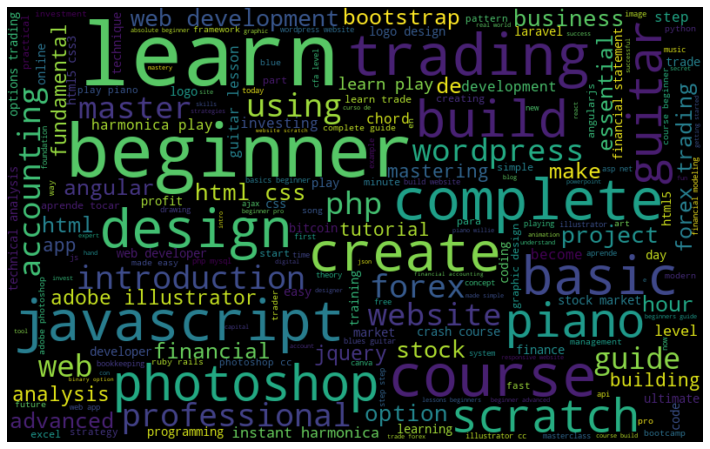

In [7]:
# What are the most frequent words in course title
# removing stop words
data["filtered_course_title"] = data["course_title"].str.lower()

from nltk.corpus import stopwords
stop = stopwords.words('english')
data['filtered_course_title'] = data['filtered_course_title'].apply(lambda x: ' '.join([word for word in x.split() if  word not in stop]))

# visualize frequent words
freq_words = " ".join([sentence for sentence in data["filtered_course_title"]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(freq_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### How can we build recommendation systems via titles using similarity

- Using `course_title` we can find out that which student opts for which type of courses and then recommend similar courses to new customers 

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64


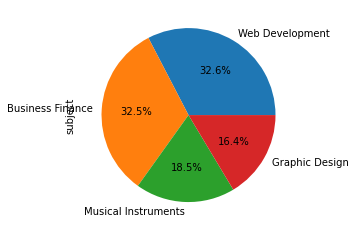

In [8]:
# How many people purchase a particular subject
data['subject'].value_counts().plot.pie(autopct='%1.1f%%')
print(data['subject'].value_counts())

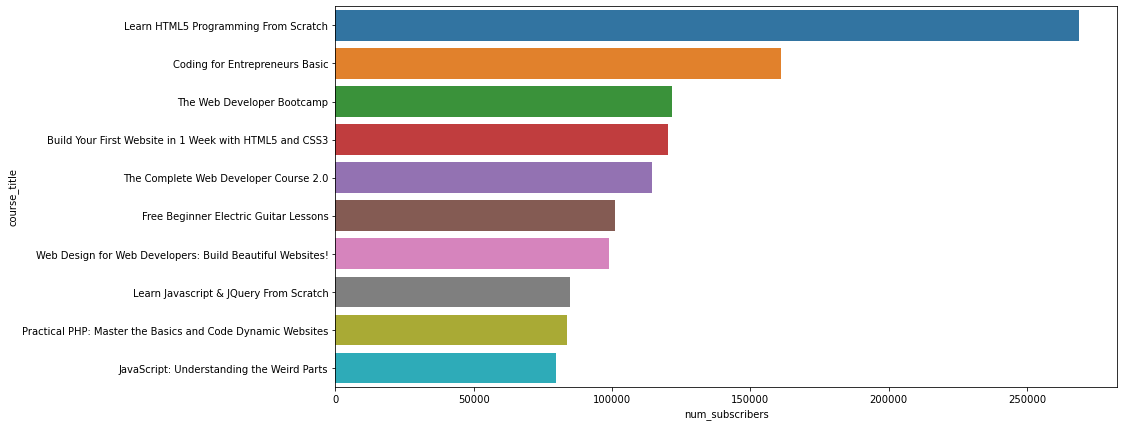

In [9]:
# Most famous courses by number of subscribers
plt.figure(figsize=[14, 7])
top_10 = data.sort_values(by='num_subscribers', ascending=False).head(10)
sns.barplot(x='num_subscribers', y ='course_title', data=top_10)
plt.show()

In [10]:
# What is the distribution of subjects
data['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

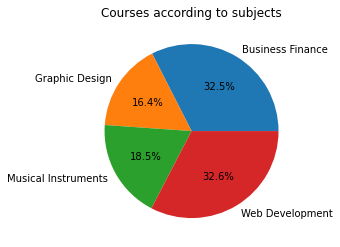

In [11]:
# How many courses per subject
groupby_subjects=data.groupby(data['subject'])['course_title'].count()
labels = data['subject'].unique()#groupby_subjects.index
values = []
for v in groupby_subjects:
    values.append(v)

plt.Figure(figsize=(15,7))
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.title("Courses according to subjects")
plt.show()

In [12]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,time,year,filtered_course_title
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,Business Finance,2017-01-18 20:58:00.580,2017,ultimate investment banking course
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,Business Finance,2017-03-09 16:34:00.200,2017,complete gst course & certification - grow ca ...
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,Business Finance,2016-12-19 19:26:00.300,2016,financial modeling business analysts consultants
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,Business Finance,2017-05-30 20:07:00.240,2017,beginner pro - financial analysis excel 2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,Business Finance,2016-12-13 14:57:00.180,2016,maximize profits trading options


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


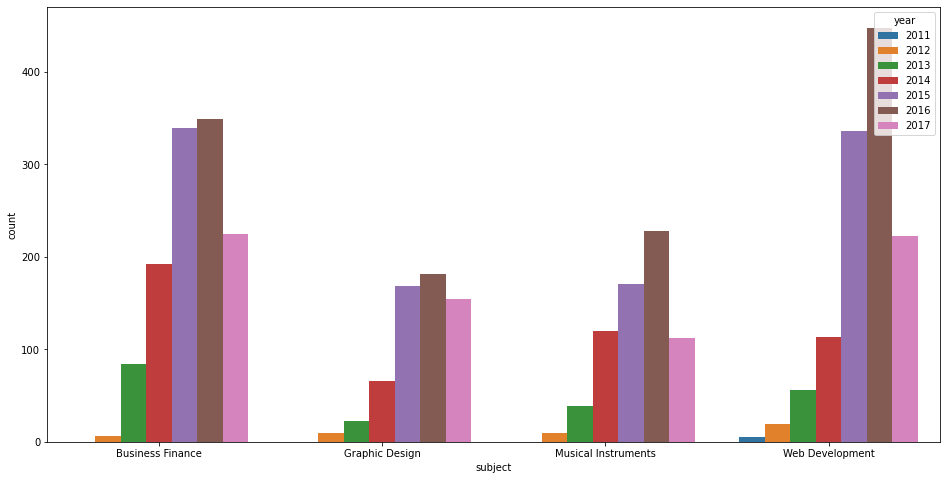

In [13]:
# Distribution of subjects per year
plt.figure(figsize=(16,8))
sns.countplot('subject', hue='year', data=data)
plt.show()

In [15]:
# How many people purchase a particular subject
df1 = data[['subject','num_subscribers']].copy()
df1.groupby(by=['subject']).sum()

,num_subscribers
subject,
Business Finance,1868711
Graphic Design,1063148
Musical Instruments,846689
Web Development,7980572


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Business Finance'),
  Text(1, 0, 'Graphic Design'),
  Text(2, 0, 'Musical Instruments'),
  Text(3, 0, 'Web Development')])

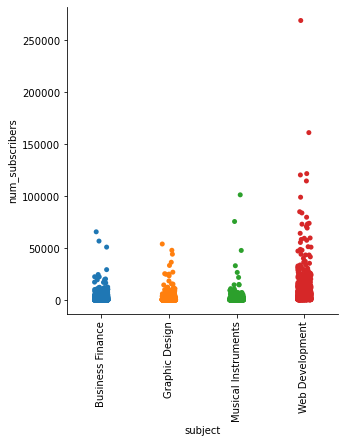

In [16]:
# Which subject is the most popular
sns.catplot(x='subject', y='num_subscribers', data= data)
plt.xticks(rotation=90)

this shows that `Web Development` subject is most popular

In [17]:
# Number of courses per year
data['year'].value_counts()

2016    1206
2015    1014
2017     715
2014     491
2013     202
2012      45
2011       5
Name: year, dtype: int64

Which year has the highest number of courses
- `2016` has maximum no of courses 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


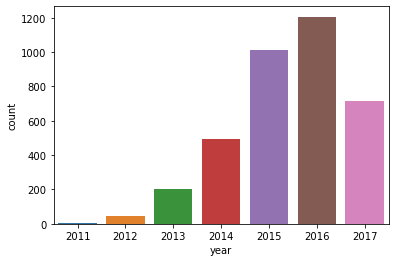

In [18]:
# What is the trend of courses per year
sns.countplot(data['year'], data=data)
plt.show()

In [19]:
# How many levels do we have
print("Levels are as follows {}".format(data['level'].unique()))

Levels are as follows ['All Levels' 'Intermediate Level' 'Beginner Level' 'Expert Level']


All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='level', ylabel='count'>

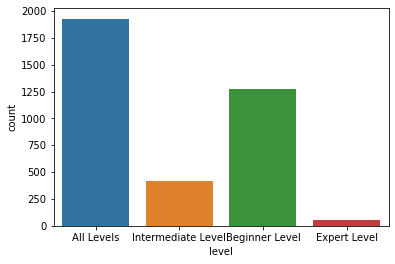

In [20]:
# What is the distribution of courses per levels
print(data['level'].value_counts())
sns.countplot('level',data=data)

In [21]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,time,year,filtered_course_title
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,Business Finance,2017-01-18 20:58:00.580,2017,ultimate investment banking course
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,Business Finance,2017-03-09 16:34:00.200,2017,complete gst course & certification - grow ca ...
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,Business Finance,2016-12-19 19:26:00.300,2016,financial modeling business analysts consultants
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,Business Finance,2017-05-30 20:07:00.240,2017,beginner pro - financial analysis excel 2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,Business Finance,2016-12-13 14:57:00.180,2016,maximize profits trading options


In [22]:
# Which subject has the highest levels
highest_subject = max(data['subject'].value_counts())
print("Subject : {}, has the maximum no of levels : {}".format(data['subject'][highest_subject],highest_subject))

Subject : Graphic Design, has the maximum no of levels : 1200


In [23]:
# How many subscribers per level
data.groupby('level')['num_subscribers'].sum()

level
All Levels            6915076
Beginner Level        4051843
Expert Level            50196
Intermediate Level     742005
Name: num_subscribers, dtype: int64

In [24]:
# How many courses per level
data.groupby('level')['course_title'].count()

level
All Levels            1929
Beginner Level        1270
Expert Level            58
Intermediate Level     421
Name: course_title, dtype: int64

In [31]:
# Which courses have the highest duration (paid or not)
data.sort_values(by='content_duration', ascending=False).head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,time,year,filtered_course_title
1658,978576,The Complete Figure Drawing Course HD,https://www.udemy.com/the-complete-figure-draw...,True,50,1323,136,225,Beginner Level,78.5,Graphic Design,2016-10-11 21:40:00.060,2016,complete figure drawing course hd


In [32]:
# Which courses have higher duration
data.sort_values(by='content_duration', ascending=False).head(10)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,time,year,filtered_course_title
1658,978576,The Complete Figure Drawing Course HD,https://www.udemy.com/the-complete-figure-draw...,True,50,1323,136,225,Beginner Level,78.5,Graphic Design,2016-10-11 21:40:00.060,2016,complete figure drawing course hd
3141,548278,The Complete Web Development Course - Build 1...,https://www.udemy.com/complete-web-development...,True,200,7501,1213,384,All Levels,76.5,Web Development,2015-11-09 22:01:00.020,2015,complete web development course - build 15 pro...
561,375594,Financial Management - A Complete Study,https://www.udemy.com/financial-management-a-c...,True,190,1941,128,527,All Levels,71.5,Business Finance,2014-12-22 16:57:00.300,2014,financial management - complete study
874,167316,TRADER BOT: Introdução à Linguagem MQL5,https://www.udemy.com/intro-mql5/,True,20,209,33,33,All Levels,70.0,Business Finance,2014-03-07 15:13:00.450,2014,trader bot: introdução à linguagem mql5
1214,62721,Anatomy for Figure Drawing: Mastering the Huma...,https://www.udemy.com/anatomy-for-figure-drawi...,True,95,15500,754,65,All Levels,68.5,Graphic Design,2013-10-16 11:37:00.300,2013,anatomy figure drawing: mastering human figure
3611,1008246,Modern E-Commerce Store In php & mysqli With B...,https://www.udemy.com/modern-e-commerce-store-...,True,50,240,45,358,All Levels,66.5,Web Development,2016-12-09 16:18:00.490,2016,modern e-commerce store php & mysqli bootstrap
1202,28556,Discover How to Draw and paint Comics,https://www.udemy.com/learn-to-draw-and-paint/,True,65,8901,424,85,All Levels,62.0,Graphic Design,2012-11-21 22:03:00.540,2012,discover draw paint comics
114,866584,Advanced Accounting A Complete Study for CA / ...,https://www.udemy.com/branch-accounts-a-comple...,True,150,1535,16,462,All Levels,62.0,Business Finance,2016-06-03 17:42:00.270,2016,advanced accounting complete study ca / cma / ...
2613,140238,Become a Professional Web Developer | Version 3.0,https://www.udemy.com/web-development-tutorials/,True,200,6851,276,454,All Levels,60.0,Web Development,2014-01-21 12:31:00.240,2014,become professional web developer | version 3.0
3004,481696,Code & Grow Rich: Earn More As An Entrepreneu...,https://www.udemy.com/code-grow-rich-earn-more...,True,200,7211,52,491,All Levels,57.0,Web Development,2016-02-10 01:09:00.190,2016,code & grow rich: earn entrepreneur developer


In [25]:
# Which course has the highest number of subscribers
top_selling_course = data.sort_values('num_subscribers', ascending=False)
top_selling_course.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,time,year,filtered_course_title
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,Web Development,2013-02-14 07:03:00.410,2013,learn html5 programming scratch


In [26]:
# Average number of subscribers
data['num_subscribers'].mean()

3197.150625339859

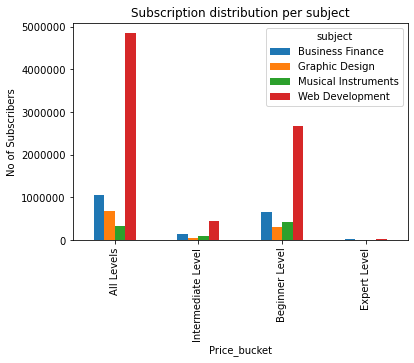

In [27]:
# Number of subscribers per Subject
data.groupby(['subject','level'],sort=False)['num_subscribers'].sum().unstack('subject').plot.bar()
plt.title('Subscription distribution per subject')
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('Price_bucket')
plt.ylabel('No of Subscribers')
plt.show()

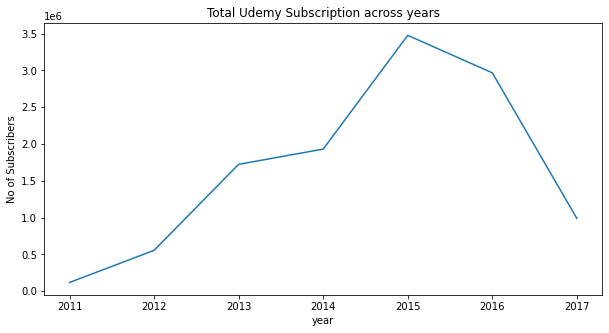

In [29]:
# Number of subscribers per year
top_selling_course.groupby('year')['num_subscribers'].sum().plot(figsize=(10,5))
plt.title('Total Udemy Subscription across years')
plt.ylabel('No of Subscribers')
plt.show()

In [30]:
# What is the average price of a course
data[data['price'] != 0]['price'].mean()

72.12885985748218

In [31]:
# What is the min/max price
print("The max value of price is {}".format(data[data['price'] != 0]['price'].max()))
print("The min value of price is {}".format(data[data['price'] != 0]['price'].min()))

The max value of price is 200
The min value of price is 20


In [32]:
# How much does Udemy earn
df2 = data['price'].sort_values(ascending=False)
data['revenue'] = df2*data['num_subscribers']
df = data.sort_values('revenue', ascending=False)
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,time,year,filtered_course_title,revenue
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,Web Development,2015-11-02 21:13:00.270,2015,web developer bootcamp,24316800
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,Web Development,2016-03-08 22:28:00.360,2016,complete web developer course 2.0,22902400
1979,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,True,200,75499,7676,362,All Levels,30.0,Musical Instruments,2014-08-07 06:27:00.510,2014,pianoforall - incredible new way learn piano &...,15099800
3204,756150,Angular 4 (formerly Angular 2) - The Complete ...,https://www.udemy.com/the-complete-guide-to-an...,True,190,73783,19649,329,All Levels,22.0,Web Development,2016-02-11 07:29:00.290,2016,angular 4 (formerly angular 2) - complete guide,14018770
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,Web Development,2015-03-12 23:19:00.540,2015,javascript: understanding weird parts,13932100


The most profitable courses is `The Web Developer Bootcamp` with highest revenue 


<AxesSubplot:>

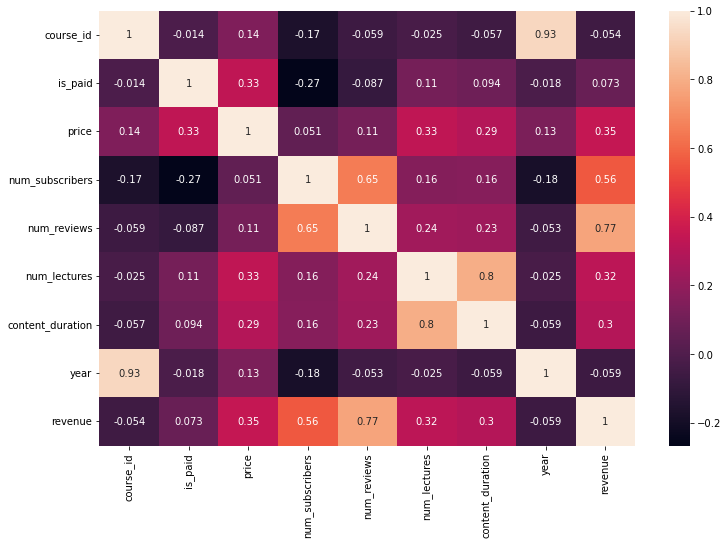

In [33]:
# See Correlation b/w columns
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

## Correlation Questions
- Does the number of subscribers depend on
    - number of reviews
    - price
    - number of lectures
    - content duration

## Create a course recommendation model using the above dataset for e.g.: Suppose I type python based on the above dataset it should recommend to me courses that are python related. Make sure you add a similarity score too.

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# tfidf_matrix - apply fit_transform() to scale the values to start the training 
tfidf_matrix = tfidf.fit_transform(data['course_title'])
tfidf_matrix.shape

(3672, 3570)

In [66]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Menghitung cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [70]:
# creating the variable 'indices' to 
indices = pd.Series(data.index, index=data['course_title']).drop_duplicates()
indices

course_title
Ultimate Investment Banking Course                                0
Complete GST Course & Certification - Grow Your CA Practice       1
Financial Modeling for Business Analysts and Consultants          2
Beginner to Pro - Financial Analysis in Excel 2017                3
How To Maximize Your Profits Trading Options                      4
                                                               ... 
Learn jQuery from Scratch - Master of JavaScript library       3673
How To Design A WordPress Website With No Coding At All        3674
Learn and Build using Polymer                                  3675
CSS Animations: Create Amazing Effects on Your Website         3676
Using MODX CMS to Build Websites: A Beginner's Guide           3677
Length: 3672, dtype: int64

In [73]:
# A function that takes a 'course_title' as input and an output course that has some similarities
def get_recommendations(title='none', cosine_sim='none'):  # Ultimate Investment Banking Course 
    # Retrieve the index of the entered course
    idx = indices[title]

    # Take the similarity score of all courses with the input course
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort courses by similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Take the 10 courses that have the highest similarity score
    sim_scores = sim_scores[1:10]

    # Take the course index
    course_indices = [i[0] for i in sim_scores]

    # Return the top 10 courses that have the highest similarity
    return data['course_title'].iloc[course_indices]

In [75]:
# Implementing the recommended function above
get_recommendations('Ultimate Investment Banking Course',cosine_sim)

39            The Complete Investment Banking Course 2017
240            Advanced Accounting for Investment Banking
417             The Investment Banking Recruitment Series
3474                           The Ultimate jQuery Course
2714                  The Ultimate Web Development Course
137     Intro to Investment Banking, M&A, IPO, Modelin...
227     Investment Banking: How to Land a Job on Wall ...
418                                  Business Banking 101
722     Investment Banking Operations : Securities Tra...
Name: course_title, dtype: object

### Conclusion: 
- The results of the recommendations given are still not quite right (because there are recommended courses that are not related)

# Method 2

Content : Title, level and subject (Recommendation results are correct)

In [76]:
# Function to remove spaces on features
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        # Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [78]:
# Implementation of the above function to clean the url, level and subject features
features = ['url','level', 'subject']

for feature in features:
    data[feature] = data[feature].apply(clean_data)

Now, I will define a function to combine the contents of `course_title`, `level` and `subject` which are used as metadata and later used for similarity calculations

In [81]:
def create_soup(x):
    return ''.join(x['course_title']) + ' '  + ''.join(x['level']) + ' '  + ''.join(x['subject'])

data['soup'] = data.apply(create_soup, axis=1)
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,time,year,filtered_course_title,revenue,soup
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,alllevels,1.5,businessfinance,2017-01-18 20:58:00.580,2017,ultimate investment banking course,429400,Ultimate Investment Banking Course alllevels b...
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,alllevels,39.0,businessfinance,2017-03-09 16:34:00.200,2017,complete gst course & certification - grow ca ...,209400,Complete GST Course & Certification - Grow You...
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,intermediatelevel,2.5,businessfinance,2016-12-19 19:26:00.300,2016,financial modeling business analysts consultants,97830,Financial Modeling for Business Analysts and C...
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,alllevels,3.0,businessfinance,2017-05-30 20:07:00.240,2017,beginner pro - financial analysis excel 2017,232845,Beginner to Pro - Financial Analysis in Excel ...
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,intermediatelevel,2.0,businessfinance,2016-12-13 14:57:00.180,2016,maximize profits trading options,255200,How To Maximize Your Profits Trading Options i...


In [84]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(data['soup'])
count_matrix

# Defines a TF-IDF Vectorizer Object. Remove all english stop words like 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

# Form the required TF-IDF matrix by matching and transforming the data
tfidf_matrix2 = tfidf.fit_transform(data['soup'])
tfidf_matrix2.shape

(3672, 3577)

In [85]:
from sklearn.metrics.pairwise import cosine_similarity

# calculate cosine similarity
cosine_sim2 = cosine_similarity(count_matrix)
cosine_sim2

array([[1.        , 0.40824829, 0.15430335, ..., 0.16666667, 0.14433757,
        0.        ],
       [0.40824829, 1.        , 0.12598816, ..., 0.13608276, 0.11785113,
        0.        ],
       [0.15430335, 0.12598816, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.16666667, 0.13608276, 0.        , ..., 1.        , 0.28867513,
        0.40824829],
       [0.14433757, 0.11785113, 0.        , ..., 0.28867513, 1.        ,
        0.11785113],
       [0.        , 0.        , 0.        , ..., 0.40824829, 0.11785113,
        1.        ]])

In [86]:
# Reset index of initial DataFrame and create reverse mapping
data2 = data.reset_index()
indices = pd.Series(data2.index, index=data2['course_title'])

In [87]:
# Recommended Results
res = get_recommendations('Ultimate Investment Banking Course', cosine_sim2)
res

39            The Complete Investment Banking Course 2017
417             The Investment Banking Recruitment Series
227     Investment Banking: How to Land a Job on Wall ...
418                                  Business Banking 101
504                         Ethereum Course for Investors
803                  Investment Portfolio Analysis with R
945                               Triple P Trading Course
3474                           The Ultimate jQuery Course
137     Intro to Investment Banking, M&A, IPO, Modelin...
Name: course_title, dtype: object